# Huang1980AndArtery for Image-Derived Input Functions and Twilite Data


## Setup

In [1]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

# basic numeric setup
import numpy as np

from Huang1980ModelAndArtery import Huang1980ModelAndArtery

In [2]:
# define data & models
petdir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421155709", "pet")
idif = os.path.join(petdir, "sub-108293_ses-20210421155709_trc-fdg_proc-MipIdif_idif.nii.gz")
twil = os.path.join(petdir, "sub-108293_ses-20210421155709_trc-fdg_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc.nii.gz")
kern = os.path.join(petdir, "kernel_hct=46.8.nii.gz")
pet = os.path.join(petdir, "sub-108293_ses-20210421155709_trc-fdg_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-2parcs.nii.gz")  # 1st two Schaeffer parcels
# pet = os.path.join(petdir, "sub-108293_ses-20210421155709_trc-fdg_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer.nii.gz")  # 309 parcels from Schaeffer

tcm_bc = Huang1980ModelAndArtery(
    idif, 
    pet,
    truths=[      
        13.2, 20.8, 59.5, 0.272, 6.25, 2.56, -1.21, -0.654, 11.7, 0.0678, 0.0466, 0.0389, 2.44, 0.0222,
        0.069, 0.003, 0.002, 0.000, 12.468, -9.492, 0.020],
    nlive=100)
tcm_ra = Huang1980ModelAndArtery(
    twil, 
    pet,
    truths=[
        21.0, 5.04, 16.8, 3.36, 11.1, 9.00, -1.50, -2.70, 23.7, 0.193, 0.0634, 0.0602, 2.49,0.0402,
        0.069, 0.003, 0.002, 0.000, 12.468, -9.492, 0.020],
    nlive=100)

Boxcar: found data for tracer fdg
{'fqfp': '/Users/jjlee/PycharmProjects/dynesty/idif2024/data/ses-20210421155709/pet/sub-108293_ses-20210421155709_trc-fdg_proc-MipIdif_idif',
 'halflife': 6586.236,
 'img': array([6.59031439e+00, 6.59031439e+00, 6.59031439e+00, 6.59031439e+00,
       6.59031439e+00, 6.59031439e+00, 5.12567282e+00, 1.66946011e+01,
       2.44249268e+01, 1.93689575e+03, 1.36209395e+04, 3.51092539e+04,
       5.63557969e+04, 8.77944766e+04, 9.04225000e+04, 1.16745906e+05,
       1.26172398e+05, 1.35783500e+05, 1.42312312e+05, 1.38628469e+05,
       1.22704836e+05, 9.53848828e+04, 7.33583984e+04, 4.96502188e+04,
       4.05599297e+04, 2.48895957e+04, 2.04163008e+04, 1.32085049e+04,
       1.00171328e+04, 8.48238477e+03, 9.70184082e+03, 1.22634102e+04,
       1.17908652e+04, 1.55776602e+04, 1.69116777e+04, 1.69116777e+04,
       1.88233496e+04, 1.57275596e+04, 1.91704395e+04, 1.99005586e+04,
       1.74169395e+04, 1.85059980e+04, 1.75372949e+04, 1.50771348e+04,
       1.600

## Inspect Huang1980ModelAndArtery with Boxcar

In [3]:
v = tcm_bc.truths
pprint("===================================== v ======================================")
pprint(v)

data = tcm_bc.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[13.2,
 20.8,
 59.5,
 0.272,
 6.25,
 2.56,
 -1.21,
 -0.654,
 11.7,
 0.0678,
 0.0466,
 0.0389,
 2.44,
 0.0222,
 0.069,
 0.003,
 0.002,
 0.0,
 12.468,
 -9.492,
 0.02]
'==================================== data ===================================='
{'halflife': 6586.236,
 'inputFuncInterp': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 60.71974166,
       73.2108646 , 75.90180047, 71.10308486, 60.56892162, 46.84360599,
       32.81875598, 20.86347605, 12.19251454,  6.81498182,  3.97387548,
        2.71518974,  2.27151801,  2.17570208,  2.2013726 ,  2.25953715,
        2.3217188 ,  2.38066099,  2.43509945,  2.48512537,  2.53105879,
        7.94699947,  8.30675273,  8.08511841,  7.61043532,  7.03177991,
        6.4317577 ,  5.85771852,  5.33546785,  4.87700325,  4.48548294,
        4.1586026 ,  3.89092486,  3.67547015,  3.50477

In [4]:
pprint("============================== tcm_bc.data2t(data) ===============================")
pprint(tcm_bc.data2t(data))
pprint("============================= tcm_bc.data2taus(data) =============================")
pprint(tcm_bc.data2taus(data))
pprint("=========================== tcm_bc.data2timesMid(data) ===========================")
pprint(tcm_bc.data2timesMid(data))
pprint("================================== tcm_bc.fqfp ===================================")
pprint(tcm_bc.fqfp)
pprint("========================== tcm_bc.input_function() =========================")
pprint(tcm_bc.input_function())
pprint("================================= tcm_bc.labels ==================================")
pprint(tcm_bc.labels)
pprint("====================== tcm_bc.load_nii(tcm_bc.fqfp + '.nii.gz') ======================")
pprint(tcm_bc.load_nii(tcm_bc.fqfp + ".nii.gz"))
pprint("=============================== tcm_bc.loglike(v) ================================")
pprint(tcm_bc.loglike(v))
pprint("================================== tcm_bc.ndim ===================================")
pprint(tcm_bc.ndim)
pprint("========================= tcm_bc.parse_halflife(tcm_bc.fqfp) =========================")
pprint(tcm_bc.parse_halflife(tcm_bc.fqfp))
pprint("========================= tcm_bc.parse_isotope(tcm_bc.fqfp) ==========================")
pprint(tcm_bc.parse_isotope(tcm_bc.fqfp))
pprint("================================== tcm_bc.sigma ==================================")
pprint(tcm_bc.sigma)
pprint("============================ tcm_bc.signalmodel(data) ============================")
pprint(tcm_bc.signalmodel(data))

('============================== tcm_bc.data2t(data) '
 '===============================')
array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 13

## Plot Huang1980ModelAndArtery with Boxcar

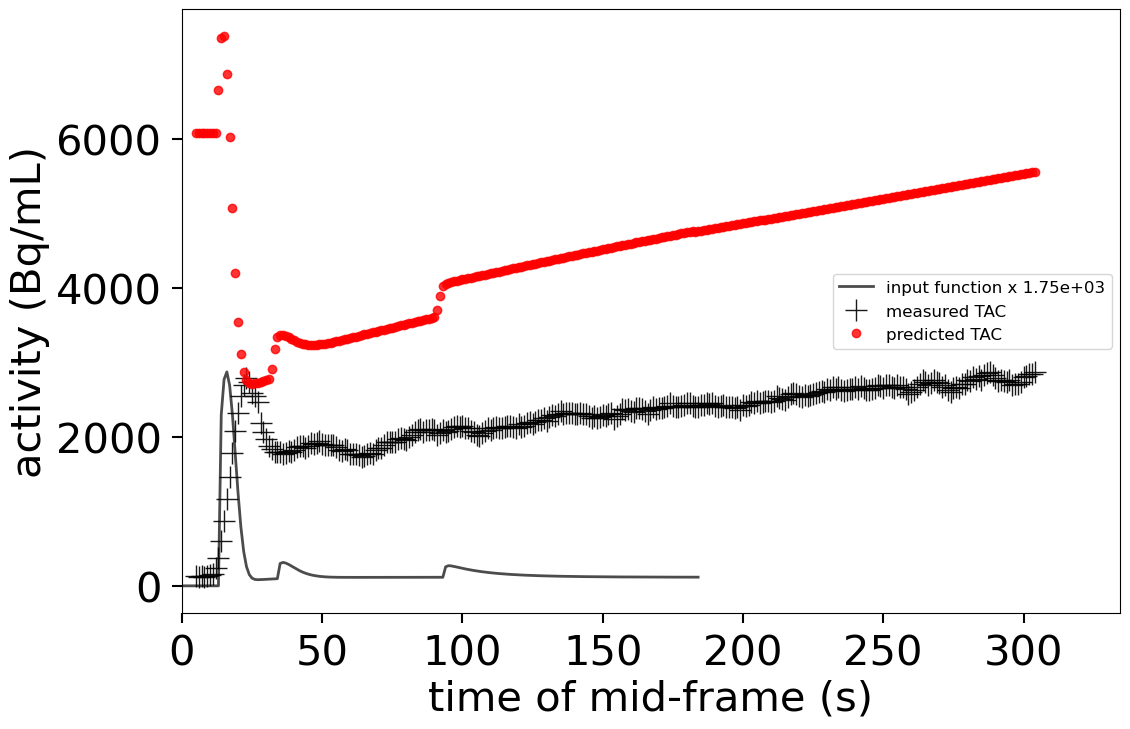

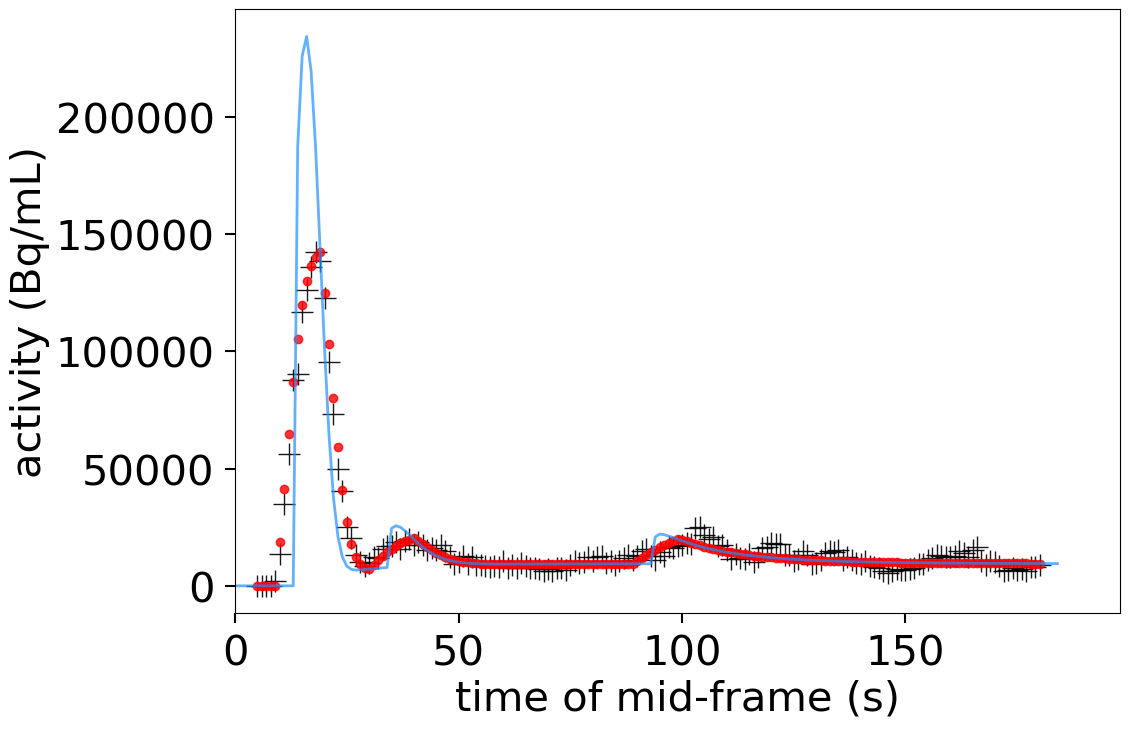

In [5]:
tcm_bc.plot_truths()

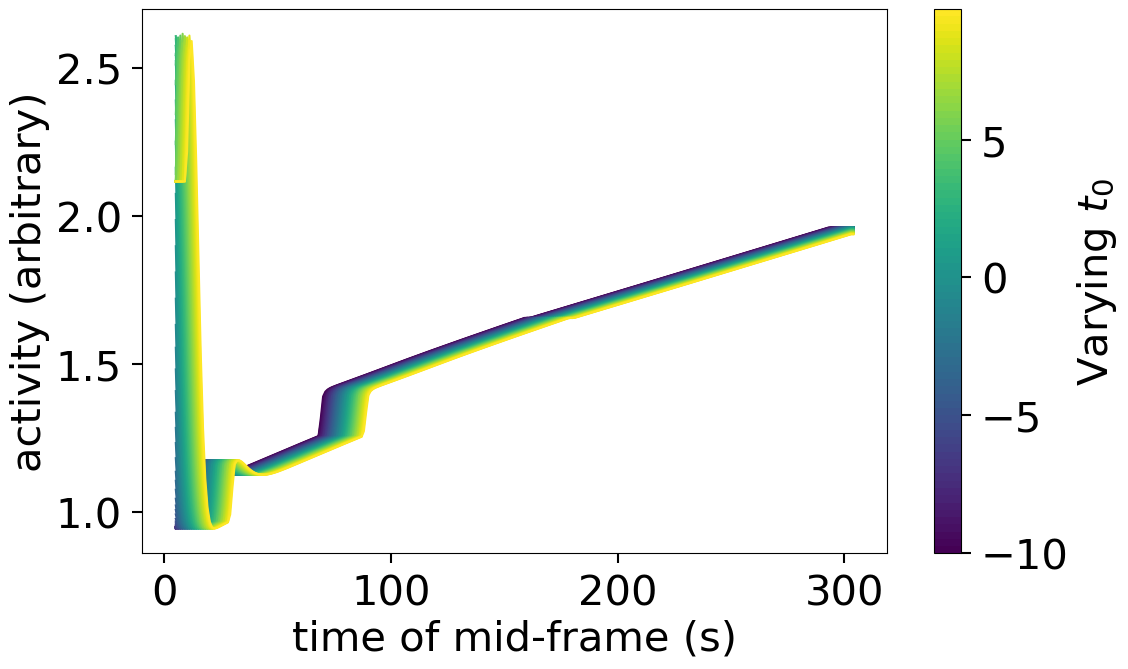

In [6]:
tcm_bc.plot_variations(18, -10, 10 , tcm_bc.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

iter: 20461 | batch: 11 | bound: 11 | nc: 1 | ncall: 2661557 | eff(%):  0.765 | loglstar: 1244.800 < 1252.262 < 1248.865 | logz: 1152.054 +/-  0.401 | stop:  0.964                                   

Parameter 0: 9.904 [9.087, 10.424]
Parameter 1: 18.510 [17.005, 20.185]
Parameter 2: 5.336 [0.238, 7.493]
Parameter 3: 1.273 [1.037, 1.722]
Parameter 4: 10.220 [9.525, 10.940]
Parameter 5: 6.703 [5.311, 8.246]
Parameter 6: -3.895 [-5.405, -2.678]
Parameter 7: -1.996 [-2.320, -1.667]
Parameter 8: 36.569 [29.549, 45.615]
Parameter 9: 0.089 [0.080, 0.099]
Parameter 10: 0.020 [0.016, 0.023]
Parameter 11: 0.040 [0.038, 0.042]
Parameter 12: 2.550 [0.635, 4.382]
Parameter 13: 0.036 [0.033, 0.040]
Parameter 14: 0.475 [0.392, 0.499]
Parameter 15: 0.173 [0.144, 0.195]
Parameter 16: 0.016 [0.013, 0.018]
Parameter 17: 0.004 [0.003, 0.004]
Parameter 18: 9.211 [7.977, 10.295]
Parameter 19: -20.625 [-22.603, -19.031]
Parameter 20: 0.012 [0.011, 0.013]


ValueError: Axis limits cannot be NaN or Inf

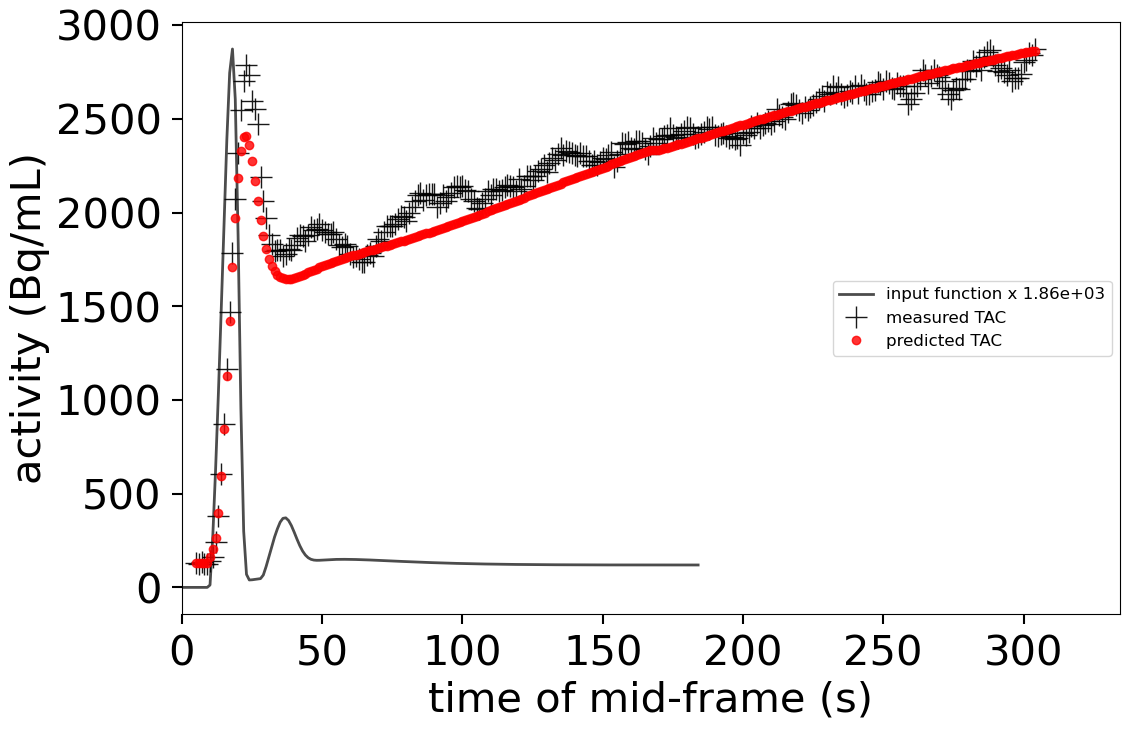

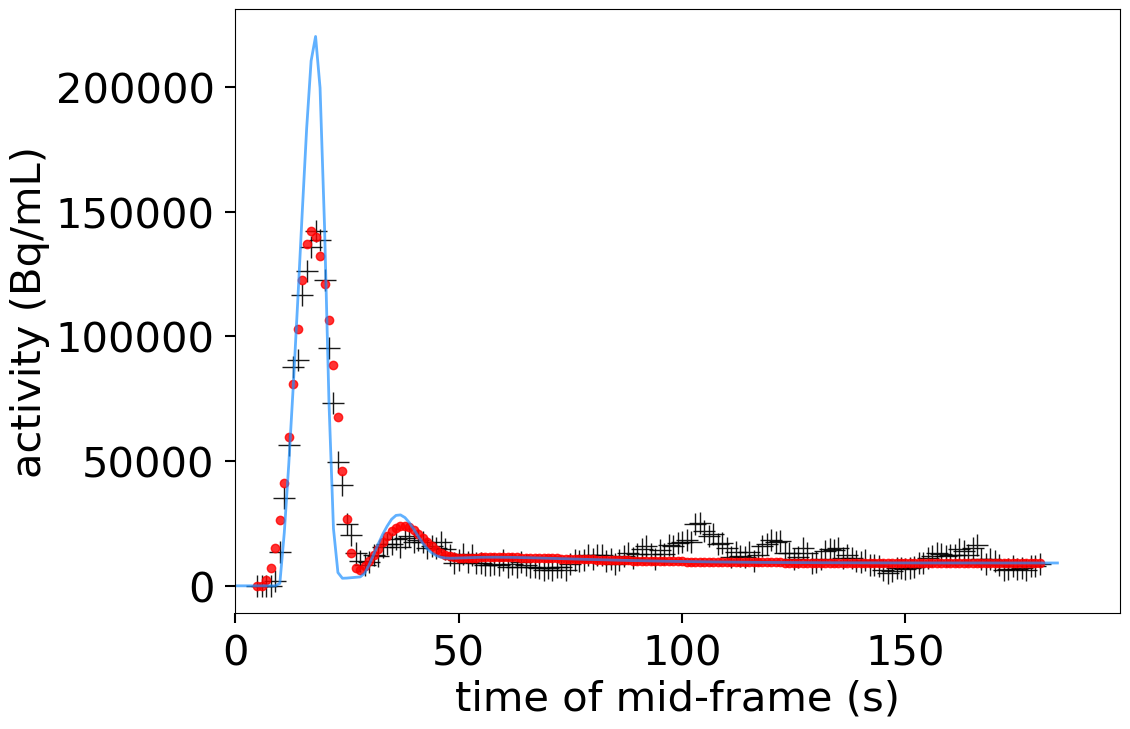

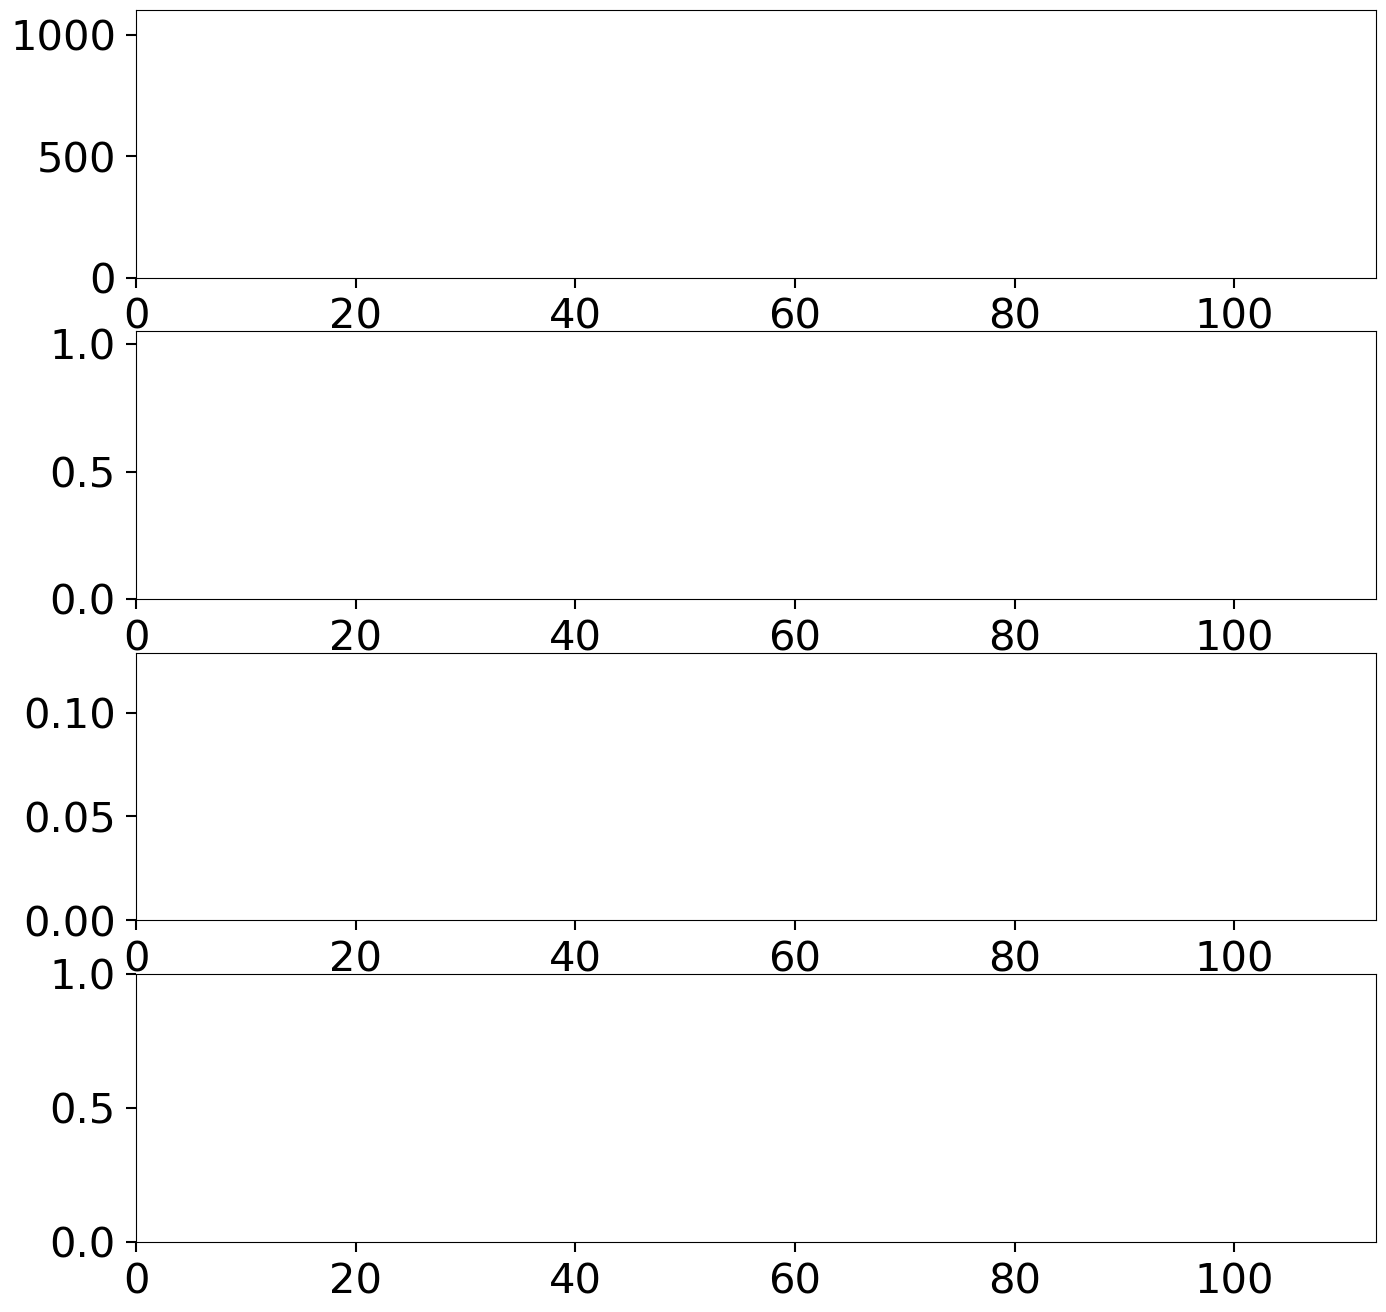

In [7]:
# de novo
res_bc = tcm_bc.run_nested(print_progress=True)

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(tcm_bc.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

## Inspect Huang1980ModelAndArtery with RadialArtery

In [ ]:
v = tcm_ra.truths
pprint("===================================== v ======================================")
pprint(v)

data = tcm_ra.data(v)
pprint("==================================== data ====================================")
pprint(data)

In [ ]:
pprint("============================== tcm_ra.data2t(data) ===============================")
pprint(tcm_ra.data2t(data))
pprint("============================= tcm_ra.data2taus(data) =============================")
pprint(tcm_ra.data2taus(data))
pprint("=========================== tcm_ra.data2timesMid(data) ===========================")
pprint(tcm_ra.data2timesMid(data))
pprint("================================== tcm_ra.fqfp ===================================")
pprint(tcm_ra.fqfp)
pprint("========================== tcm_ra.input_function() =========================")
pprint(tcm_ra.input_function())
pprint("================================= tcm_ra.labels ==================================")
pprint(tcm_ra.labels)
pprint("====================== tcm_ra.load_nii(tcm_ra.fqfp + '.nii.gz') ======================")
pprint(tcm_ra.load_nii(tcm_ra.fqfp + ".nii.gz"))
pprint("=============================== tcm_ra.loglike(v) ================================")
pprint(tcm_ra.loglike(v))
pprint("================================== tcm_ra.ndim ===================================")
pprint(tcm_ra.ndim)
pprint("========================= tcm_ra.parse_halflife(tcm_ra.fqfp) =========================")
pprint(tcm_ra.parse_halflife(tcm_ra.fqfp))
pprint("========================= tcm_ra.parse_isotope(tcm_ra.fqfp) ==========================")
pprint(tcm_ra.parse_isotope(tcm_ra.fqfp))
pprint("================================== tcm_ra.sigma ==================================")
pprint(tcm_ra.sigma)
pprint("============================ tcm_ra.signalmodel(data) ============================")
pprint(tcm_ra.signalmodel(data))

## Plot Huang1980ModelAndArtery with RadialArtery

In [ ]:
tcm_ra.plot_truths()

In [ ]:
tcm_ra.plot_variations(0, 0.0022, 0.017 , tcm_ra.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [ ]:
# de novo
res_ra = tcm_ra.run_nested(print_progress=True)

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(tcm_ra.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results